# Airbnb New User Bookings - Kaggle

### Problem:
Instead of waking to overlooked "Do not disturb" signs, Airbnb travelers find themselves rising with the birds in a whimsical treehouse, having their morning coffee on the deck of a houseboat, or cooking a shared regional breakfast with their hosts.

New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

### To Do:  In this project, Airbnb challenges you to predict in which country a new user will make his or her first booking.

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 



## 1. First Part: Exploratory Data Analysis

This part is to perform an initial analysis on the data.

In this part, we should 

- describe the overall data 
- handle some common problems such as missing data
- discover consumer behavior patterns if any

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

sns.set(rc={'figure.figsize':(8, 6)})

In [2]:
# Load the data
train_data = pd.read_csv('Data/train_users_2.csv')

In [3]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
print(f"There are {train_data.shape[0]} users in the training dataset.")

There are 213451 users in the training dataset.


### a. Missing Data

There are lots of missing data. We should examine those and make decisions on the missing data.

From the first impression, 'gender' seems to have data labeled as 'unknown'.

We will convert those into NULL.

In [5]:
train_data['gender'].replace('-unknown-', np.nan, inplace=True)

And 'first_affiliate_tracked' contains value 'untracked', which should be replaced with NULL too.

In [6]:
train_data['first_affiliate_tracked'].replace('untracked', np.nan, inplace=True)

In [7]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,NaN,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,NaN,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,US


Let's look at how many NULL values are in our dataset.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     117763 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    98154 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


So 'date_first_booking', 'gender', 'age', and 'first_affiliate_tracked' contain all of the missing values.

Let's look into these columns.

In [9]:
train_data['date_first_booking'].describe()

count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object

In [10]:
train_data['gender'].describe()

count     117763
unique         3
top       FEMALE
freq       63041
Name: gender, dtype: object

In [11]:
train_data['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [12]:
train_data['first_affiliate_tracked'].describe()

count      98154
unique         6
top       linked
freq       46287
Name: first_affiliate_tracked, dtype: object

All other columns except "age" look okay.

But some users are 1 year old and 2014 years old....

This clearly violates Airbnb registration terms and our common sense.

So we need to take care of those by replacing them with null.

In [13]:
train_data.loc[train_data['age'] > 95, 'age'] = np.nan
train_data.loc[train_data['age'] < 13, 'age'] = np.nan

### b. Categorical Variables

For some variables, we need to transform them into category type / datetime type.

In [14]:
#transform categorical variables
categorical_vars = ['affiliate_channel','affiliate_provider','country_destination','first_affiliate_tracked',
'first_browser', 'first_device_type','gender','language','signup_app','signup_method']

for categorical_var in categorical_vars:
    train_data[categorical_var] = train_data[categorical_var].astype('category')

In [15]:
#tranform datetime variables
train_data['date_account_created'] = pd.to_datetime(train_data['date_account_created'])
train_data['date_first_booking'] = pd.to_datetime(train_data['date_first_booking'])
train_data['date_first_active'] = pd.to_datetime((train_data.timestamp_first_active // 1000000), format='%Y%m%d')

### c. Data Visualization

Next, we will exam the data thoroughly by visualizing the dataset.

Hopefully, we will not see any anomaly of the data, like outliers.

#### Visualize Gender

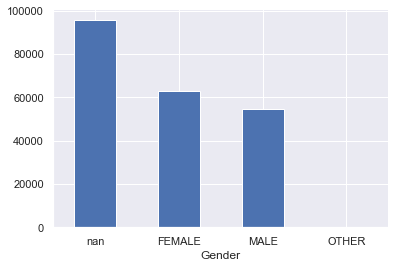

In [16]:
train_data['gender'].value_counts(dropna=False).plot(kind='bar', rot = 0)
plt.xlabel('Gender')
sns.despine()

There are a lot of missing data in this column. And female travellers are slightly more than male travellers.

#### Visualize Gender by Destination Country

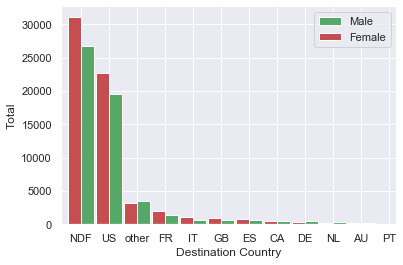

In [17]:
female_data = train_data.loc[train_data['gender'] == 'FEMALE', 'country_destination'].value_counts()
male_data = train_data.loc[train_data['gender'] == 'MALE', 'country_destination'].value_counts()

#plot
width = 0.45

male_data.plot(kind='bar', width=width, color='g', position=0, label='Male', rot=0)
female_data.plot(kind='bar', width=width, color='r', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Total')

sns.despine()
plt.show()

The samples for male and females seem to be balanced.

#### Visualize Travelers by Booking Status

In [18]:
all_count = train_data.shape[0]
book_count = train_data[train_data['country_destination'] == 'NDF'].shape[0]
nonbook_count = train_data[train_data['country_destination'] != 'NDF'].shape[0]
bookings = pd.DataFrame({'Book' : [book_count / all_count],
     'No_Book' : [nonbook_count / all_count]})

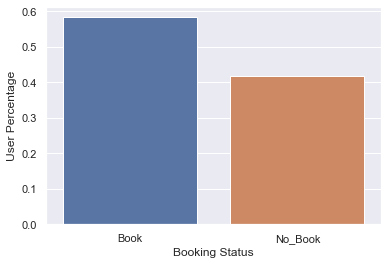

In [19]:
#plot
width = 0.45

ax = sns.barplot(data=bookings)
ax.set(xlabel='Booking Status', ylabel='User Percentage')
plt.show()

The users who booked are more than the users who did not book.

#### Visualize Age

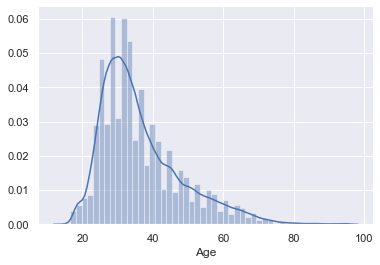

In [20]:
sns.distplot(train_data['age'].dropna())
plt.xlabel('Age')
sns.despine()

From here, we could clearly see the pattern of age for travelers.

Most travelers are from 20 to 40 years old.

#### Visualize Date

Now, we need to plot the date to see if any anomaly exists.

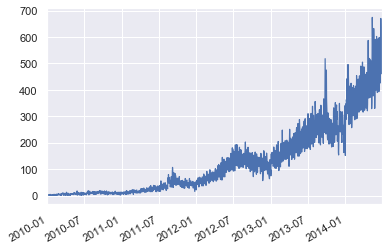

In [21]:
#plot date of account created
train_data['date_account_created'].value_counts().plot(kind='line', linewidth=1.2)

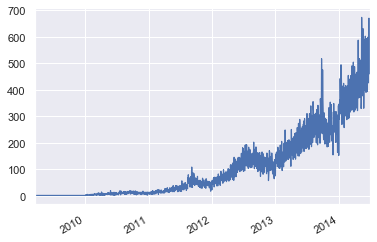

In [22]:
#plot date of first active
train_data['date_first_active'].value_counts().plot(kind='line', linewidth=1.2)

The dates look normal, e.g., not skewed and within the range when the training dataset was cut off.

#### Visualize Date by day of the week

In [23]:
weekdays = []
for date in train_data['date_account_created']:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

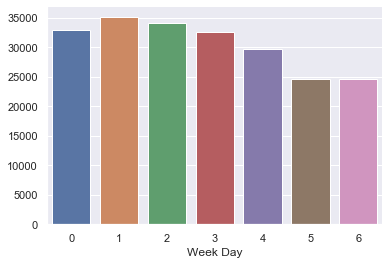

In [24]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

Interesting finding here: Tuesdays are the highest peak days.

This might relate to the fact that on Tuesdays plane tickets are usually the lowest during the week.

Thus, travelers who book cheap flight tickets will also book their staying.

#### Visualize Date by Destination Country

Starting 01/01/2013, we see huge increase in the booking rate.

Thus, we might need to examine if the increased reservations were affected by the destination countries.

In [25]:
date = pd.to_datetime(20130101, format='%Y%m%d')

before = sum(train_data.loc[train_data['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(train_data.loc[train_data['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = train_data.loc[train_data['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = train_data.loc[train_data['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100

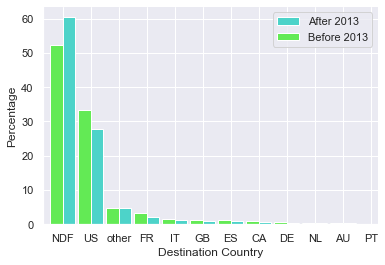

In [26]:
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='After 2013', rot=0)
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=1, label='Before 2013', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

We could see that destination country has nothing related to the booking rate.

In fact, even though more people registered after 2013, a huge part of them never made any reservation.

#### After we examine our data and confirm data are suitable for building the model, we should now move on to the next part.

## 2. Second Part:  Prediction

This part is to build machine learning models and actually make a prediction on the testing dataset.

In this part, we should 

- find the best machine learning models to fit the training dataset
- make predictions on the testing dataset

### a. Finish processing data

In [27]:
#I have already pre-processed some columns during the first part
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,NaN,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,NaN,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,NaN,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,NaN,Web,Mac Desktop,Chrome,US,2009-12-08


We have already known there were four columns with missing data:

'date_first_booking', 'gender', 'age', and 'first_affiliate_tracked' 

#### i. Datetime type column
#### Here are the strategies for handling columns that have 'datetime' type:

- Intuition: people who have known Airbnb longer are more likely to book their first reservation
- So we would like to see if the time span (in days) between 'date_first_active' and 'date_account_created' affects the booking status

- 'date_first_booking' has the same meaning as 'country_destination' (null first-booking date means that a person did not book, i.e. did not have a destination country), we can drop this column as it creates redundancy for our analysis
- Since 'data_account_created' is very likely to be close to 'date_first_booking', we can use 'data_account_created' minus 'date_first_active' to compute our desired activity time span

In [28]:
#make sure that null first-booking date means that a person did not book, 
#i.e. did not have a destination country
train_data.loc[train_data['date_first_booking'].isnull()]['country_destination'].unique()

[NDF]
Categories (1, object): [NDF]

There is only one result "NDF" (no destination) when 'date_first_booking' is null.

So we can drop ths column.

Besides, we will not need "timestamp_first_active", so we can drop this column too.

In [29]:
train_data.drop(['date_first_booking', 'timestamp_first_active'], axis = 1, inplace = True)

Next, calculate the time span between when users had their first activities and when users created their account.

In [30]:
train_data['active_time_span'] = (train_data['date_account_created'] - train_data['date_first_active']).dt.days

Calculate the percentage of people who signup right after they had their first activity:

In [31]:
percentage_signup_quick = train_data[train_data['active_time_span'] == 0].id.count() / train_data.shape[0]

print(f"The percentage of people who created accounts right after they had their first activity is {percentage_signup_quick:.3f}%")

The percentage of people who created accounts right after they had their first activity is 0.999%


#### The result is surprising! 

#### Nearly everyone in the training dataset signed up right after they first look into Airbnb.com!

So at this point, the columns with "datetime" type can be dropped since they are irrelevant to the prediction.

In [32]:
train_data.drop(['date_account_created', 'date_first_active', 'active_time_span'], axis = 1, inplace = True)

#### ii. Gender & Age

We can remove gender and age since there are a lot of missing values in these columns.

And due to complex policies, gender and age are often not allowed to be included in some data analysis project.

In [33]:
train_data.drop(['gender', 'age'], axis = 1, inplace = True)

#### iii. first_affiliate_tracked

Since 'first_affiliate_tracked' contains no valuable information (too many missing data), we will drop this column.

In [34]:
train_data.drop(['first_affiliate_tracked'], axis = 1, inplace = True)

So far we have removed 'date_account_created', 'date_first_booking', 'timestamp_first_active', 'gender', 'age', and 'first_affiliate_tracked'. 

In [35]:
# training dataset after processing
train_data.head()

,id,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,basic,3,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,US


#### Now we have finished analyzing and processing the traning data, let's perform the same steps to the testing data.

In [36]:
#here we can import testing dataset and perform the same steps as to the training dataset

#load data
test_data = pd.read_csv('Data/test_users.csv')

#transform categorical variables
categorical_vars = ['affiliate_channel','affiliate_provider','first_affiliate_tracked','first_browser', 'first_device_type','gender','language','signup_app','signup_method']

for categorical_var in categorical_vars:
    test_data[categorical_var] = test_data[categorical_var].astype('category')
    
# drop unnecessary columns
test_data.drop(['date_account_created', 'date_first_booking', 'timestamp_first_active', 'gender', 'age', 'first_affiliate_tracked'], axis = 1, inplace = True)


In [37]:
test_data.head()

,id,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser
0,5uwns89zht,facebook,0,en,direct,direct,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,basic,0,en,direct,direct,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,basic,0,en,direct,direct,Web,Windows Desktop,Chrome
3,6c6puo6ix0,basic,0,en,direct,direct,Web,Windows Desktop,IE
4,czqhjk3yfe,basic,0,en,direct,direct,Web,Mac Desktop,Safari


### b. One-Hot Encoding

In order for us to fit data into machine learning models, we cannot have some columns in categorical type. 

Thus, we must convert them into a form that can be provided to the algorithms.

In [38]:
# signup_method
train_data["signup_method"] = (train_data["signup_method"] == "basic").astype(int)
test_data["signup_method"] = (test_data["signup_method"] == "basic").astype(int)

# signup_flow
train_data["signup_flow"] = (train_data["signup_flow"] == 3).astype(int)
test_data["signup_flow"] = (test_data["signup_flow"] == 3).astype(int)

# language
train_data["language"] = (train_data["language"] == 'en').astype(int)
test_data["language"] = (test_data["language"] == 'en').astype(int)

# affiliate_channel
train_data["affiliate_channel"] = (train_data["affiliate_channel"] == 'direct').astype(int)
test_data["affiliate_channel"] = (test_data["affiliate_channel"] == 'direct').astype(int)

# affiliate_provider
train_data["affiliate_provider"] = (train_data["affiliate_provider"] == 'direct').astype(int)
test_data["affiliate_provider"] = (test_data["affiliate_provider"] == 'direct').astype(int)

# signup_app
train_data["signup_app"] = (train_data["signup_app"] == 'iOS').astype(int)
test_data["signup_app"] = (test_data["signup_app"] == 'WebiOS').astype(int)

# first_device_type
train_data["first_device_type"] = (train_data["first_device_type"] == 'iPhone').astype(int)
test_data["first_device_type"] = (test_data["first_device_type"] == 'iPhone').astype(int)

# first_browser
train_data["first_browser"] = (train_data["first_browser"] == 'Chrome').astype(int)
test_data["first_browser"] = (test_data["first_browser"] == 'Chrome').astype(int)

In [39]:
train_data.head()

,id,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,0,0,1,1,1,0,0,1,NDF
1,820tgsjxq7,0,0,1,0,0,0,0,1,NDF
2,4ft3gnwmtx,1,1,1,1,1,0,0,0,US
3,bjjt8pjhuk,0,0,1,1,1,0,0,0,other
4,87mebub9p4,1,0,1,1,1,0,0,1,US


In [40]:
test_data.head()

,id,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser
0,5uwns89zht,0,0,1,1,1,0,1,0
1,jtl0dijy2j,1,0,1,1,1,0,1,0
2,xx0ulgorjt,1,0,1,1,1,0,0,1
3,6c6puo6ix0,1,0,1,1,1,0,0,0
4,czqhjk3yfe,1,0,1,1,1,0,0,0


### 2. Build Models

Now we can start fit the machine learning models.

In [59]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [60]:
# define training and testing sets

Y = train_data["country_destination"]
X = train_data.drop(["country_destination", "id"], axis=1)

test_X = test_data.drop("id",axis=1).copy()

The above defines the training and testing dataset we will be input into our model.

Next, we need to map country_destination to numerical values.

In [61]:
# modify country_destination to numerical values

country_to_num = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_to_country = { y:x for x,y in country_to_num.items()}

Y = Y.map(country_to_num).cat.codes

In [58]:
# convert to numpy format
X = X.values
Y = Y.values
test_X = test_X.values

#### Use k-fold cross validation to select the best model

In [46]:
names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process", "Random Forest"]

In [47]:
classifiers = [KNeighborsClassifier(3), SVC(kernel="linear", C=1), \
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), \
               GaussianNB()]

In [48]:
def get_acc_auc_kfold(X, Y, classifier = KNeighborsClassifier(3)):
    accuracies = []
    
    kf = KFold(n_splits = 2, random_state = 42)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        model = classifier.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        acc = accuracy_score(Y_pred, Y_test)
        
        accuracies.append(acc)
     
    return mean(accuracies)

In [49]:
def get_acc(X, Y, classifier = None):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    model = classifier.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_pred, Y_test)
    
    return acc

In [ ]:
for name, clf in zip(names, classifiers):
    kf = KFold(n_splits=2)
    acc = get_acc(X, Y, classifier = clf)
    print(f"Mean Accuracy for {name} is {acc}")
    print("================================")

From the output, we will choose Support Vector Machine as our best model for prediction.

### 3. Prediction

In [52]:
svm = SVC(kernel="linear", C=1).fit(X, Y)
Y_pred = svm.predict(test_X)

In [63]:
# convert type to integer
Y_pred = Y_pred.astype(int)

# change values back to original country symbols
Y_pred = pd.Series(Y_pred).map(num_to_country)

In [65]:
# Create submission

country_df = pd.DataFrame({
        "id": test_data["id"],
        "country": Y_pred
    })

submission = pd.DataFrame(columns=["id", "country"])

# sort countries according to most probable destination country 
for key in country_df['country'].value_counts().index:
    submission = pd.concat([submission, country_df[country_df["country"] == key]], ignore_index=True)

submission.to_csv('airbnb.csv', index=False)